In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('data.csv')

# Drop ID column if present
df.drop(columns=['ID'], inplace=True)

# Target column
target = 'Price'

# Split into features and target
X = df.drop(columns=[target]).values
y = df[target].values.reshape(-1, 1)


       Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors   Year_Built  \
count   495.000000    494.000000     499.000000  497.000000   498.000000   
mean    174.568172      2.955466       1.977956    1.963783  1957.734940   
std      74.952343      1.441925       0.819880    0.802401    35.470026   
min      51.265396      1.000000       1.000000    1.000000  1900.000000   
25%     109.649929      2.000000       1.000000    1.000000  1926.250000   
50%     178.023265      3.000000       2.000000    2.000000  1959.000000   
75%     239.828895      4.000000       3.000000    3.000000  1988.000000   
max     298.241199      5.000000       3.000000    3.000000  2022.000000   

       Has_Garden    Has_Pool  Garage_Size  Location_Score  \
count  494.000000  499.000000   496.000000      499.000000   
mean     0.536437    0.490982    30.225806        5.156770   
std      0.499176    0.500420    11.536040        2.851229   
min      0.000000    0.000000    10.000000        0.004428   
25%  

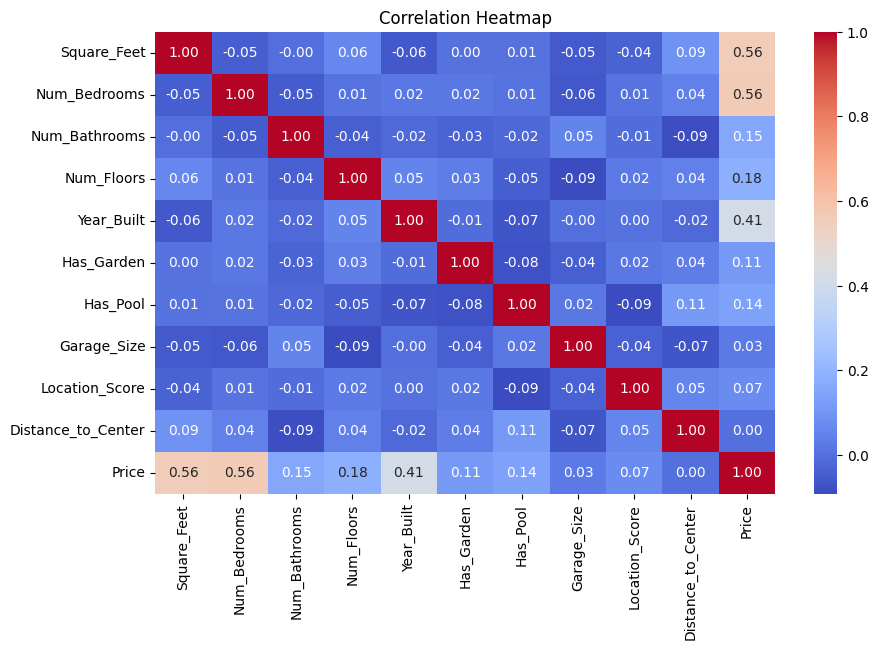

In [16]:
# Basic stats
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [19]:
# Rename column if needed (your column seems to be 'Square_Fe' due to cut-off)
df = df.rename(columns=lambda x: x.strip())
df = df.rename(columns={'Square_Fe': 'Square_Feet'})

# Drop rows with missing values
df = df.dropna()

# Make sure all are numeric
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()


In [20]:
# Feature and target
X = df[['Square_Feet']].values
y = df[['Price']].values

# Add bias (intercept) column: X_b = [1, x]
X_b = np.hstack([np.ones((X.shape[0], 1)), X])

# Normal Equation: theta = (X^T X)^-1 X^T y
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print("Intercept (Bias):", theta[0][0])
print("Slope (Weight):", theta[1][0])


Intercept (Bias): 4199.511880457966
Slope (Weight): 9.371570035665252


In [21]:
# Predictions
y_pred = X_b @ theta

# Mean Squared Error
mse = np.mean((y - y_pred) ** 2)

# Residual Sum of Squares
rss = np.sum((y - y_pred) ** 2)

print("Mean Squared Error:", mse)
print("Residual Sum of Squares:", rss)


Mean Squared Error: 1011946.8865428793
Residual Sum of Squares: 475615036.67515326


In [23]:
# Use all features except ID and Price as input
# ID was already dropped earlier, so we only drop 'Price' here
X = df.drop(columns=['Price']).values
y = df[['Price']].values

# Add intercept
X_b = np.hstack([np.ones((X.shape[0], 1)), X])

# Normal Equation
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Predictions and evaluation
y_pred = X_b @ theta
mse = np.mean((y - y_pred) ** 2)
rss = np.sum((y - y_pred) ** 2)

print("Intercept and Weights:", theta.flatten())
print("Mean Squared Error:", mse)
print("Residual Sum of Squares:", rss)

Intercept and Weights: [-2.87338195e+04  1.01739362e+01  5.05447199e+02  2.95902915e+02
  2.15230472e+02  1.50690894e+01  2.98804288e+02  4.79540958e+02
  1.13504634e+01  4.81381638e+01 -2.01031809e+01]
Mean Squared Error: 35906.80793740057
Residual Sum of Squares: 16876199.730578266


In [25]:
from sklearn.preprocessing import StandardScaler

# Drop only the 'Price' column, as 'ID' was already dropped
X_raw = df.drop(columns=['Price'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Add intercept
X_b = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])
y = df[['Price']].values

# Normal Equation
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Predictions
y_pred = X_b @ theta
mse = np.mean((y - y_pred) ** 2)
rss = np.sum((y - y_pred) ** 2)

print("Mean Squared Error (standardized):", mse)

Mean Squared Error (standardized): 35906.80793740053


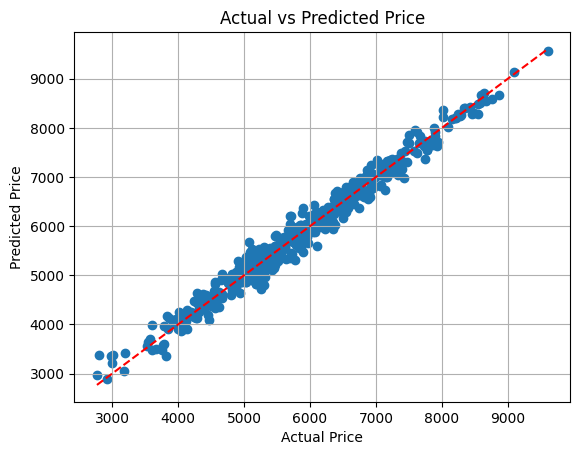

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # diagonal line
plt.grid(True)
plt.show()


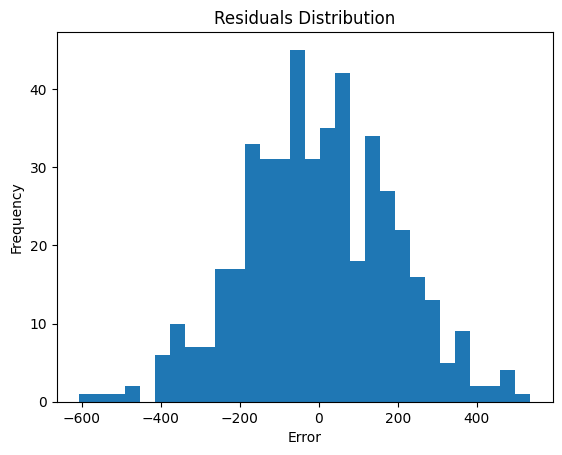

In [27]:
residuals = y - y_pred
plt.hist(residuals, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()
